In [10]:
import dalecLoad as dl
import pandas as pd
import SD_NC_loading as sdl
from datetime import datetime, time, date
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

In [11]:
biglog = dl.load_DALEC_dir('data/Jul-Aug/')#, file_names=['DALEC_71.dtf', 'DALEC_72_73.dtf'])
biglog

loading ... data/Jul-Aug/DALEC_71.dtf
loading ... data/Jul-Aug/DALEC_72_73.dtf
loading ... data/Jul-Aug/LOG_0082.dtf
loading ... data/Jul-Aug/LOG_0083.dtf
loading ... data/Jul-Aug/LOG_0084.dtf
loading ... data/Jul-Aug/LOG_0085.dtf
loading ... data/Jul-Aug/LOG_0086.dtf
loading ... data/Jul-Aug/LOG_0087.dtf
loading ... data/Jul-Aug/LOG_0088.dtf
loading ... data/Jul-Aug/LOG_0089.dtf


Voltage Solar Azi   Relaz  \
Channel spectral_ind Datetime                                             
Ed      21           2022-07-28 10:00:17.067     11.6     129.9  -132.8   
Lsky    217          2022-07-28 10:00:17.067     11.6     129.9  -132.8   
        218          2022-07-28 10:00:17.067     11.6     129.9  -132.8   
        219          2022-07-28 10:00:17.067     11.6     129.9  -132.8   
        220          2022-07-28 10:00:17.067     11.6     129.9  -132.8   
...                                               ...       ...     ...   
        21           2022-08-15 13:59:58.245     11.6     214.4   130.4   
        22           2022-08-15 13:59:58.245     11.6     214.4   130.4   
        23           2022-08-15 13:59:58.245     11.6     214.4   130.4   
        25           2022-08-15 13:59:58.245     11.6     214.4   130.4   
Lu      220          2022-08-15 13:59:58.245     11.6     214.4   130.4   

                                                      Lon  Roll Pitch  \
Channel spectral_ind Datetime                                           
Ed      21           2022-07-28 10:00:17.067  -3.92305679   0.0   3.0   
Lsky    217          2022-07-28 10:00:17.067  -3.92305679   0.0   3.0   
        218          2022-07-28 10:00:17.067  -3.92305679   0.0   3.0   
        219          2022-07-28 10:00:17.067  -3.92305679   0.0   3.0   
        220          2022-07-28 10:00:17.067  -3.92305679   0.0   3.0   
...                                                   ...   ...   ...   
        21           2022-08-15 13:59:58.245  -3.92305679  -1.0   1.0   
        22           2022-08-15 13:59:58.245  -3.92305679  -1.0   1.0   
        23           2022-08-15 13:59:58.245  -3.92305679  -1.0   1.0   
        25           2022-08-15 13:59:58.245  -3.92305679  -1.0   1.0   
Lu      220          2022-08-15 13:59:58.245  -3.92305679  -1.0   1.0   

                                                 Temp Gearpos GPS_Fix Heading  \
Channel spectral_ind Datetime                                                   
Ed      21           2022-07-28 10:00:17.067  25.8125   -98.5       F   357.1   
Lsky    217          2022-07-28 10:00:17.067  25.5625   -98.5       F   357.1   
        218          2022-07-28 10:00:17.067  25.5625   -98.5       F   357.1   
        219          2022-07-28 10:00:17.067  25.5625   -98.5       F   357.1   
        220          2022-07-28 10:00:17.067  25.5625   -98.5       F   357.1   
...                                               ...     ...     ...     ...   
        21           2022-08-15 13:59:58.245   29.875   -89.4       F   344.8   
        22           2022-08-15 13:59:58.245   29.875   -89.4       F   344.8   
        23           2022-08-15 13:59:58.245   29.875   -89.4       F   344.8   
        25           2022-08-15 13:59:58.245   29.875   -89.4       F   344.8   
Lu      220          2022-08-15 13:59:58.245  25.5625   -89.4       F   344.8   

                                             Integration Time         Lat  \
Channel spectral_ind Datetime                                               
Ed      21           2022-07-28 10:00:17.067               64  56.1468505   
Lsky    217          2022-07-28 10:00:17.067                8  56.1468505   
        218          2022-07-28 10:00:17.067                8  56.1468505   
        219          2022-07-28 10:00:17.067                8  56.1468505   
        220          2022-07-28 10:00:17.067                8  56.1468505   
...                                                       ...         ...   
        21           2022-08-15 13:59:58.245               27  56.1468505   
        22           2022-08-15 13:59:58.245               27  56.1468505   
        23           2022-08-15 13:59:58.245               27  56.1468505   
        25           2022-08-15 13:59:58.245               27  56.1468505   
Lu      220          2022-08-15 13:59:58.245              465  56.1468505   

                                              Saturation Flag So

In [12]:
result_30min = dl.resampleMultiLog(biglog, method='median', freq='30min')
result_1day = dl.resampleMultiLog(biglog, method='median', freq='1D')


In [13]:
df_daily_gridded = dl.uniform_grid_spectra_multi(result_1day, resample_to_SDs=False)
df_30min_gridded = dl.uniform_grid_spectra_multi(result_30min, resample_to_SDs=False)
dalec_daily_sd = dl.uniform_grid_spectra_multi(result_1day, resample_to_SDs=True)

In [14]:
# modifying to look at period plotting

def plot_algorithm_from_DF(df, algorithm=sdl.NDPCI_from_DF, col_names=None, show_legend=False,
                           y_label='PC (mg m $^{-3}$)', grid=True,
                           plot_show=True, date_format='%H:%M', 
                           dailyTicks=False, date_label='Time (hh-mm)', **kwargs):
    '''
    applies the chosen algorithm to the selected columns of the DF and plots the results
    if no column names are specified, then all columns will be processed and plotted
    '''
    if col_names is None:
        col_names = list(df.columns.values)
    results = [algorithm(df, col_name=col, **kwargs) for col in col_names]
    
    x = df.index.get_level_values(0).unique().time # x is the list of times

    my_day = date(2014, 7, 15)
    x_dt = [ datetime.combine(my_day, t) for t in x ]
    for result, col_name in zip(results, col_names):
        plt.scatter(x_dt, result, label=col_name, marker='o', alpha=0.8)
        
    plt.xticks(rotation = 45)
    plt.xlabel(date_label)
    plt.ylabel(y_label)

    ax = plt.gca()
    date_form = DateFormatter(date_format)
    ax.xaxis.set_major_formatter(date_form) # set format
    if dailyTicks:
        ax.xaxis.set_major_locator(mdates.DayLocator(interval=1)) # make sure that ticks only appear daily
    if grid:
        ax.grid()
    if show_legend:
        plt.legend()
    plt.tight_layout()
    if plot_show:
        plt.show()
    return ax

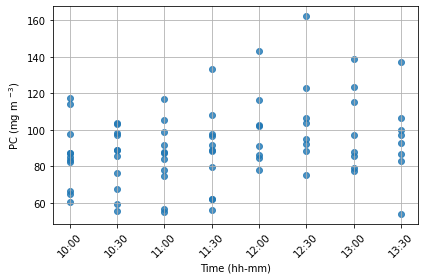

<AxesSubplot:xlabel='Time (hh-mm)', ylabel='PC (mg m $^{-3}$)'>

In [15]:
plot_algorithm_from_DF(df_30min_gridded, col_names=['Rrs_median'])

all high chla?: True
any low chla?: False
any unknown?: [False False False False False False False False False False False]


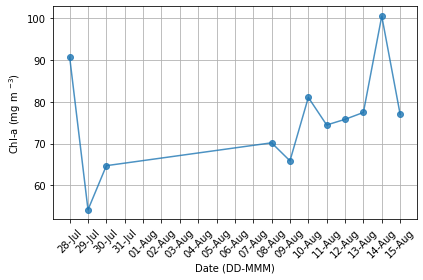

<AxesSubplot:xlabel='Date (DD-MMM)', ylabel='Chl-a (mg m $^{-3}$)'>

In [16]:
sdl.plot_algorithm_from_DF(df_daily_gridded, col_names=['Rrs_median'],
                           algorithm=sdl.NDChlaI_from_DF, y_label='Chl-a (mg m $^{-3}$)')

all high chla?: True
any low chla?: False
any unknown?: [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False]


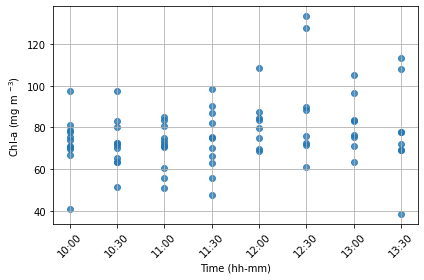

<AxesSubplot:xlabel='Time (hh-mm)', ylabel='Chl-a (mg m $^{-3}$)'>

In [20]:
plot_algorithm_from_DF(df_30min_gridded, col_names=['Rrs_median'], algorithm=sdl.NDChlaI_from_DF, y_label='Chl-a (mg m $^{-3}$)')

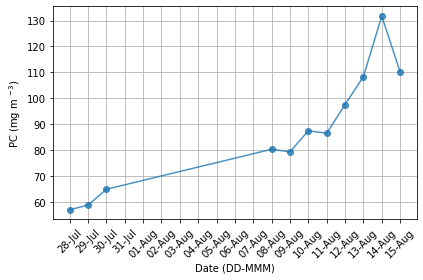

<AxesSubplot:xlabel='Date (DD-MMM)', ylabel='PC (mg m $^{-3}$)'>

In [17]:
sdl.plot_algorithm_from_DF(df_daily_gridded, col_names=['Rrs_median'])

In [18]:
SD_directory = 'C:/Users/daa5/\
OneDrive - University of Stirling/\
PlanetData/\
Airthrey_8-20Aug-TOAR_psscene_analytic_8b_udm2/\
acolite_output/'
coord_deep = [56.146746528609306, -3.92285731543299] # this is perhaps a deeper part of the loch
SD_df = sdl.load_multiple_SDs(SD_directory, coord_deep)

AttributeError: 'Timestamp' object has no attribute 'dt'

In [ ]:
superDF = sdl.join_DALEC_SD_dfs(dalec_daily_sd, SD_df)

In [ ]:
SD_df.index.get_level_values(0).dtype

In [ ]:
SD_df.keys

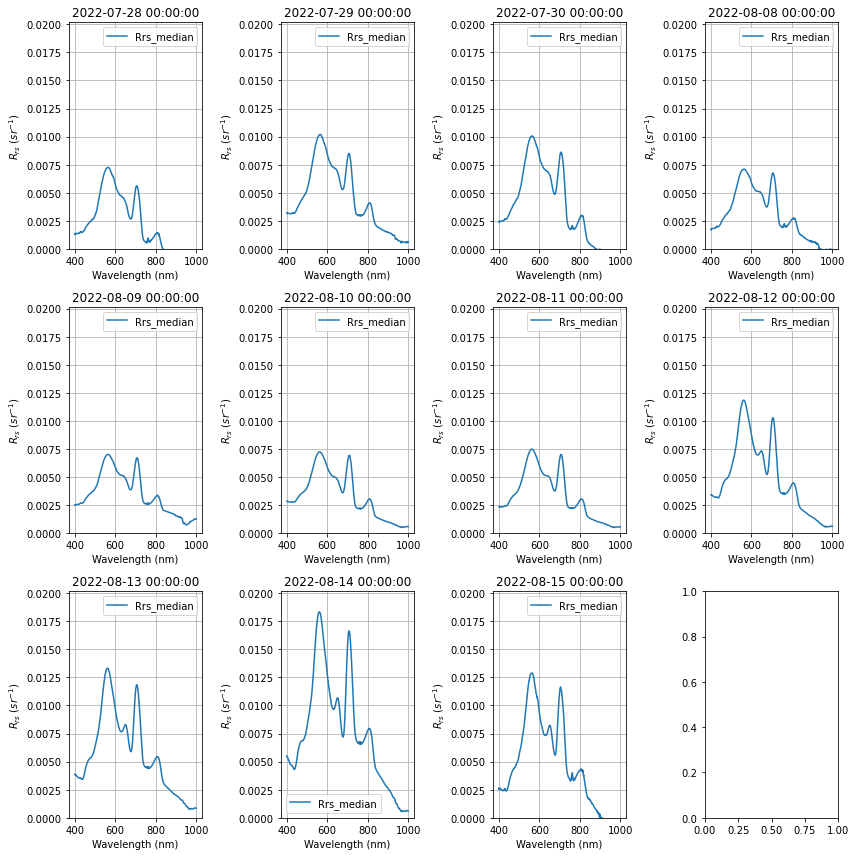

(<Figure size 864x864 with 12 Axes>,
 array([<AxesSubplot:title={'center':'2022-07-28 00:00:00'}, xlabel='Wavelength (nm)', ylabel='$R_{rs}$ $(sr^{-1}$)'>,
        <AxesSubplot:title={'center':'2022-07-29 00:00:00'}, xlabel='Wavelength (nm)', ylabel='$R_{rs}$ $(sr^{-1}$)'>,
        <AxesSubplot:title={'center':'2022-07-30 00:00:00'}, xlabel='Wavelength (nm)', ylabel='$R_{rs}$ $(sr^{-1}$)'>,
        <AxesSubplot:title={'center':'2022-08-08 00:00:00'}, xlabel='Wavelength (nm)', ylabel='$R_{rs}$ $(sr^{-1}$)'>,
        <AxesSubplot:title={'center':'2022-08-09 00:00:00'}, xlabel='Wavelength (nm)', ylabel='$R_{rs}$ $(sr^{-1}$)'>,
        <AxesSubplot:title={'center':'2022-08-10 00:00:00'}, xlabel='Wavelength (nm)', ylabel='$R_{rs}$ $(sr^{-1}$)'>,
        <AxesSubplot:title={'center':'2022-08-11 00:00:00'}, xlabel='Wavelength (nm)', ylabel='$R_{rs}$ $(sr^{-1}$)'>,
        <AxesSubplot:title={'center':'2022-08-12 00:00:00'}, xlabel='Wavelength (nm)', ylabel='$R_{rs}$ $(sr^{-1}$)'>,
        <Ax

In [19]:
sdl.multiDaySpectraPlot(df_daily_gridded,
                         SD_col_slice=slice(0, 0), # slice returns empty as we don't have any SD data yet
                         ylim=[0, df_daily_gridded['Rrs_median'].max(axis=0)*1.1],
                         figsize=(12, 12))